In [1]:
import boa
import seaborn as sns
import pandas as pd
from scripts.setup import setup

In [2]:
deployment = setup()
(deployer, user, tokens, vault_tokens, pool) = (deployment.deployer, deployment.user, deployment.erc20_list, deployment.erc4626_list, deployment.pool)

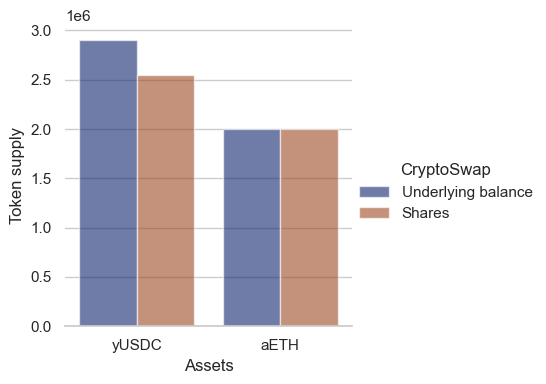

In [8]:
def display_pool_chart(pool):
    data = []
    balances = (pool.balances(0), pool.balances(1))
    for i in range(len(balances)):
        underlying_balance = (vault_tokens[i].convertToAssets(balances[i]))
        data.append([vault_tokens[i].symbol(), "Underlying balance", underlying_balance / 10 ** 18])
        data.append([vault_tokens[i].symbol(), "Shares", balances[i] / 10 ** 18])
    sns.set_theme(style="whitegrid")
    data = pd.DataFrame(data,columns=["asset","type","amount"])
    g = sns.catplot(
        data=data, kind="bar",
        x="asset", y="amount", hue="type",
        ci="sd", palette="dark", alpha=.6, height=4
    )
    g.despine(left=True)
    g.set_axis_labels("Assets", "Token supply")
    g.legend.set_title("CryptoSwap")
    
display_pool_chart(pool)

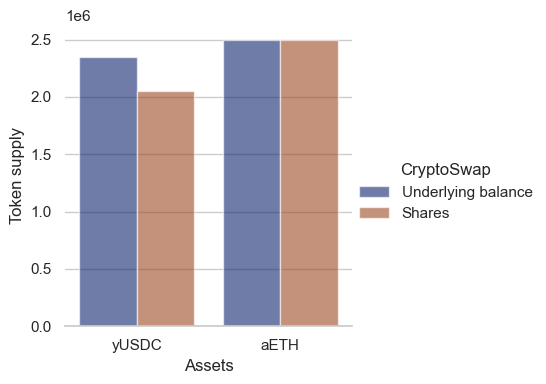

In [9]:
with boa.env.prank(user):
    pool.exchange(1, 0, int(0.5 * 10**6 * 10**18), 0)
    
display_pool_chart(pool);

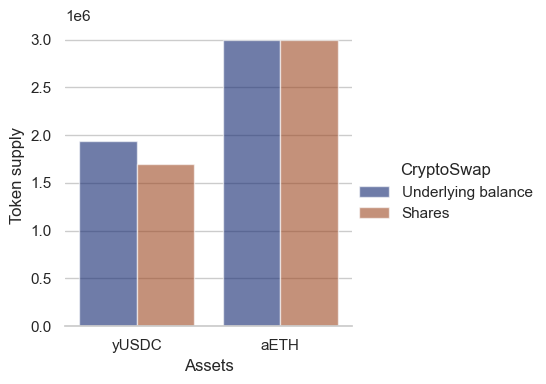

In [10]:
with boa.env.prank(user):
    pool.exchange_underlying(1, 0, int(0.5 * 10**6 * 10**18), 0)
    
display_pool_chart(pool);

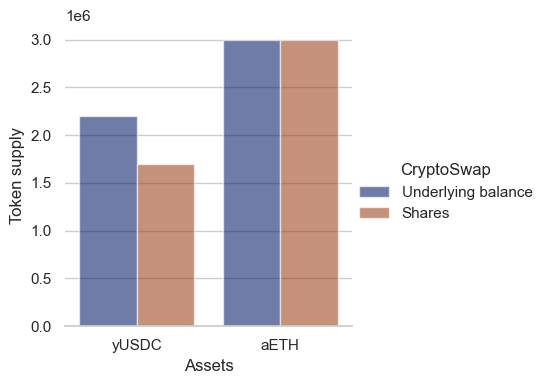

In [11]:
with boa.env.prank(user):
    tokens[0].transfer(vault_tokens[0].address, 1 * 10**6 * 10**18)
    
display_pool_chart(pool);

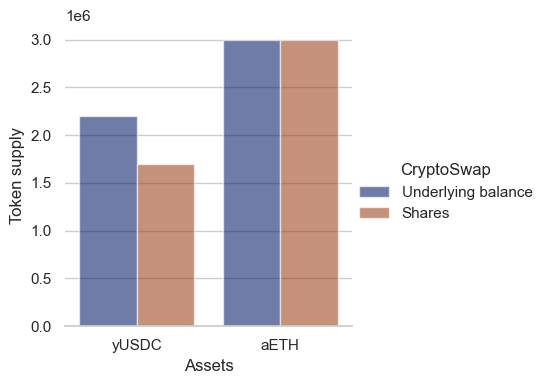

In [12]:
with boa.env.prank(user):
    pool.exchange_underlying(1, 0, int(1.5 * 10**18), 0)
    
display_pool_chart(pool);